**Importing Neccessary Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt

In [ ]:
# obtaining a list of all the files and directories within datadir.
datadir="/content/drive/MyDrive/fire detection final"
subfolder=os.listdir(datadir)
subfolder

['test', 'train']

**Setting up image data generators**

In [ ]:
# Initialize ImageDataGenerator objects for both training and testing  data
train_datagenerator = ImageDataGenerator(rescale=1/255)
test_datagenerator=ImageDataGenerator(rescale=1/255)

**Load Training and Testing Data**

In [ ]:
# The images are resized to 150x150 pixels and rescaled to values between 0 and 1.
train_dataset = train_datagenerator.flow_from_directory( '/content/drive/MyDrive/fire detection final/train',
                                                       target_size=(150,150),batch_size=32,class_mode='binary')

test_dataset=test_datagenerator.flow_from_directory('/content/drive/MyDrive/fire detection final/test',
                                                    target_size=(150,150),batch_size=32,class_mode='binary')


Found 3260 images belonging to 2 classes.
Found 926 images belonging to 2 classes.


In [ ]:
# assigning index to both the classes
test_dataset.class_indices

{'No fire': 0, 'fire': 1}

**Building CNN Model**

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

**Compiling the model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Training the model**

In [ ]:
r=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
102/102 [==============================] - 395s 4s/step - loss: 0.4201 - accuracy: 0.8328 - val_loss: 0.3897 - val_accuracy: 0.8521
Epoch 2/10
102/102 [==============================] - 29s 284ms/step - loss: 0.2939 - accuracy: 0.8837 - val_loss: 0.3469 - val_accuracy: 0.8596
Epoch 3/10
102/102 [==============================] - 33s 320ms/step - loss: 0.2806 - accuracy: 0.8899 - val_loss: 0.3369 - val_accuracy: 0.8575
Epoch 4/10
102/102 [==============================] - 28s 275ms/step - loss: 0.2559 - accuracy: 0.8972 - val_loss: 0.3236 - val_accuracy: 0.8629
Epoch 5/10
102/102 [==============================] - 29s 281ms/step - loss: 0.2293 - accuracy: 0.9126 - val_loss: 0.3746 - val_accuracy: 0.8542
Epoch 6/10
102/102 [==============================] - 29s 287ms/step - loss: 0.2102 - accuracy: 0.9141 - val_loss: 0.3087 - val_accuracy: 0.8693
Epoch 7/10
102/102 [==============================] - 28s 276ms/step - loss: 0.1842 - accuracy: 0.9248 - val_loss: 0.2167 - val_accu

In [ ]:
# save the trained model object to a file named 'fire.sav'
import pickle
pickle.dump(model,open('fire.sav','wb'))

**Making Predictions**

In [ ]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

29/29 [==============================] - 6s 188ms/step


In [ ]:
predictions

In [ ]:
print(len(predictions))

926


**Plotting Training History**

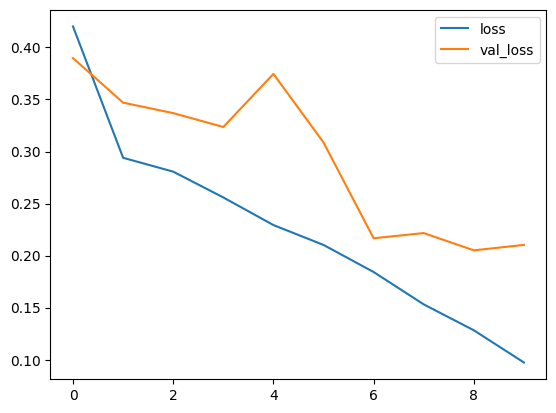

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

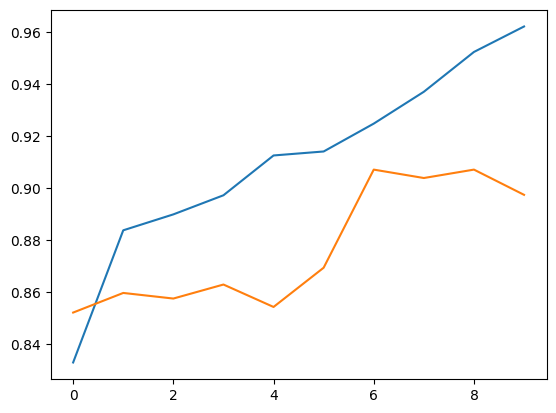

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')

**Image Prediction Function**

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(150,150))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==1:
    plt.xlabel("fire",fontsize=30)
  elif val==0:
    plt.xlabel("no fire",fontsize=30)

**Example Image Prediction**

1/1 [==============================] - 0s 282ms/step
[[0.]]


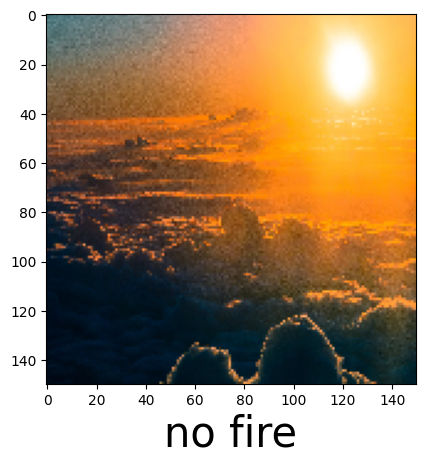

In [ ]:
#predicting an image of a sun
predictImage("/content/sun.jpg")

1/1 [==============================] - 0s 18ms/step
[[0.]]


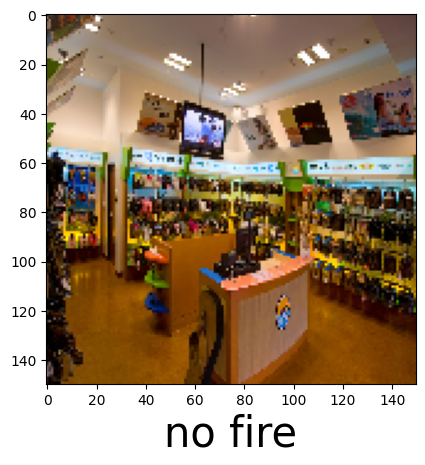

In [ ]:
#predicting an image of a store with yellowish colour and no fire anywhere
predictImage("/content/drive/MyDrive/fire detection final/test/No fire/56.jpg")

1/1 [==============================] - 0s 27ms/step
[[1.]]


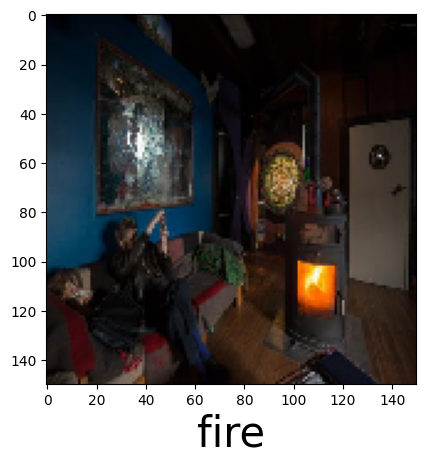

In [ ]:
#predicting an image with fire
predictImage("/content/drive/MyDrive/fire detection final/test/fire/0cd656f34b9411f3_jpg.rf.fbbc204d0efa38745123b0106c866a26.jpg")

In [ ]:
from tensorflow.keras.models import save_model

save_model(model,'firedetection.h5')

<ipython-input-22-27b630c3fee2>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'firedetection.h5')
